Design a Low Pass Filter (LPF) Butterworth filter with the following parameters: $\varepsilon=0.3$; $\lambda=4$; Cut-off frequency $f_{c}=4$ GHz; and Ripple frequency at stop band $f_{r}=8$ GHz ( );  for the load/source impedances of 50 Ohm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cst
from plotfont import font_func 
### load the fonts (optional)
fontD, axis_label_font, axis_ticklabel_font = font_func( fontD_size = 28, axis_label_font_size = 32, 
                                 axis_ticklabel_font_size = 28)

Font size = 28 ;  Title Font Size = 28 ;  Axis Label Font Size = 32 ;  Axis Ticklabel Font Size = 28 ;


1. Calculate all poles and scale them to the  $f_{c}=4$ GHz; then draw/mark them on a graph;
Code for poles:

In [20]:
r = 33.96 * 10**9
n = np.array([1, 2, 3, 4])

p = r * np.exp(1j * (2*n+3)/8 * cst.pi)
p_angle = np.angle(p)
p_mag = np.abs(p)

1.33005844889856e+42
(-12995929363.118446+31374948924.083298j)


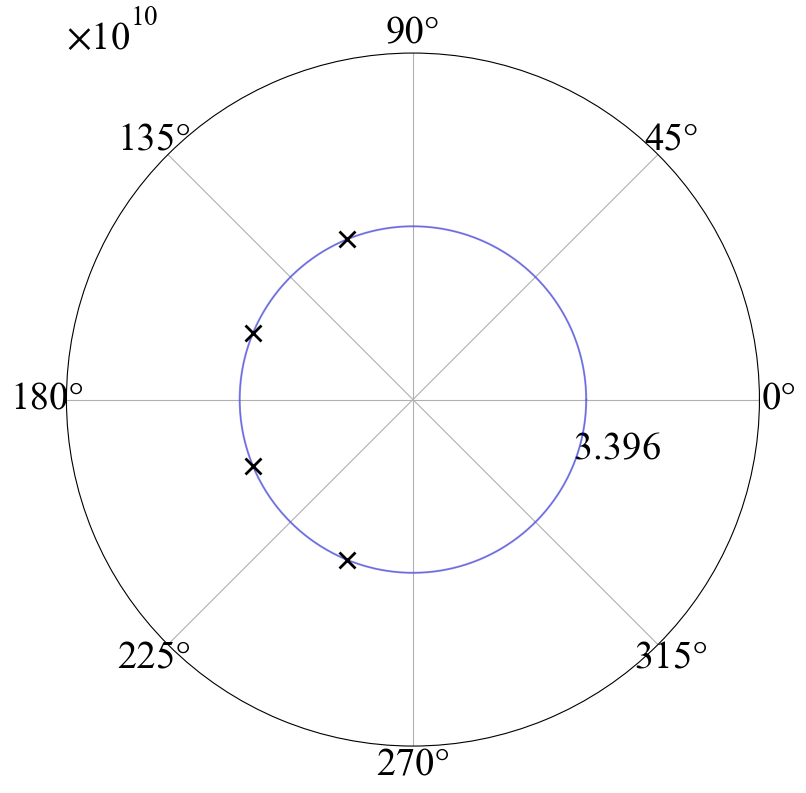

In [21]:
fig = plt.figure(facecolor='w',figsize=(12,9))
plt.rc('font',**fontD) # change fonts
ax = fig.add_subplot(1, 1, 1, projection='polar')
### create circle for mag=r
circle_theta = np.linspace(0, 2 * np.pi, 500)
circle_r = np.full_like(circle_theta, r)
ax.plot(circle_theta, circle_r, color='blue', alpha=0.4)
### axis ticks manipulation
rticks = [r / 2, r]
ax.set_rticks(rticks)
ax.set_rlabel_position(-22.5)
yticklabels = [f'{rtick / 10**6:.1f}M' for rtick in rticks]
### plot the poles and save the figure
ax.plot(p_angle, p_mag, 'x', markersize=12, markeredgecolor='black', markeredgewidth=2, color='red')
plt.savefig('Q1-poles.png', bbox_inches='tight', pad_inches=0.05, dpi=300, transparent=True)
plt.show()

2. Obtain the expression of transfer function $H(s)$ and plot it in Matlab/Python vs. $s=j\omega$  for both amplitude and phase
$$H(s)=\frac{-p_1 p_2..p_N}{(s-p_1)(s-p_2)(s-p_N)}$$

In [35]:
### generate the latex code for H(s) function
from scipy.signal import butter, TransferFunction
import sympy as sp

s = sp.symbols('s')

Hs_numerator = np.abs(np.prod(p))
factor_14 = sum([s**2,-(p[0]+p[3]).real*s,(p[0]*p[3]).real])
factor_23 = sum([s**2,-(p[1]+p[2]).real*s,(p[1]*p[2]).real])
Hs_denominator = sp.prod([factor_14,factor_23])
Hs_math = Hs_numerator/Hs_denominator
# sp.pprint(Hs_math, use_unicode=True) #print out the unicode expression
Hs_latex = sp.latex(Hs_math)
print (Hs_latex)

\frac{1.33005844889856 \cdot 10^{42}}{\left(s^{2} + 25991858726.2369 s + 1.1532816 \cdot 10^{21}\right) \left(s^{2} + 62749897848.1666 s + 1.1532816 \cdot 10^{21}\right)}


$$\frac{1.33005844889856 \cdot 10^{42}}{\left(s^{2} + 25991858726.2369 s + 1.1532816 \cdot 10^{21}\right) \left(s^{2} + 62749897848.1666 s + 1.1532816 \cdot 10^{21}\right)}
\frac{\mathtt{\text{[1.]}}}{\mathtt{\text{[1.         2.61312593 3.41421356 2.61312593 1.        ]}}}
$$

Plot the mag and phase:

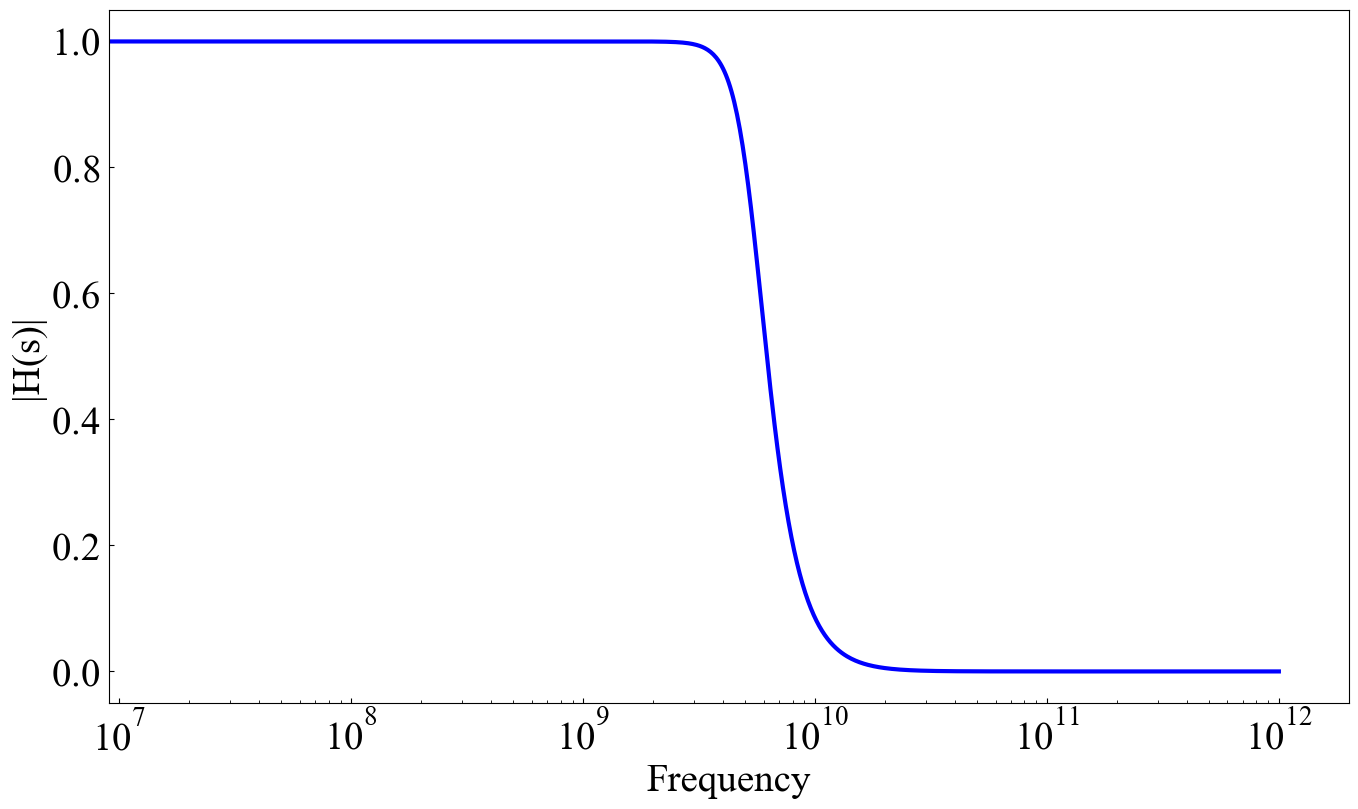

In [53]:
### Convert H(s) expression to a numerical function
Hs_numerical = sp.lambdify(s, Hs_math)
### sweep frequency from 1e6 to 1e12
freq = np.logspace(6,12,num=1000)
s_values = 2*cst.pi*freq*1j 
Hs_values = np.array([Hs_numerical(s_val) for s_val in s_values])
### make the magnitude plot
fig = plt.figure(facecolor='w',figsize=(16,9))
plt.rc('font',**fontD) # change fonts
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(which = 'both', direction = "in",pad = 6, color = 'black')
ax.set_xscale('log')
ax.set_xlim(9e6,2e12)
ax.plot(freq, abs(Hs_values), color='#0000FF',lw = 3)
plt.xlabel('Frequency')
plt.ylabel('|H(s)|')
plt.savefig('Q2-mag.png', bbox_inches='tight', pad_inches=0.05, dpi=300, transparent=True)
plt.show()

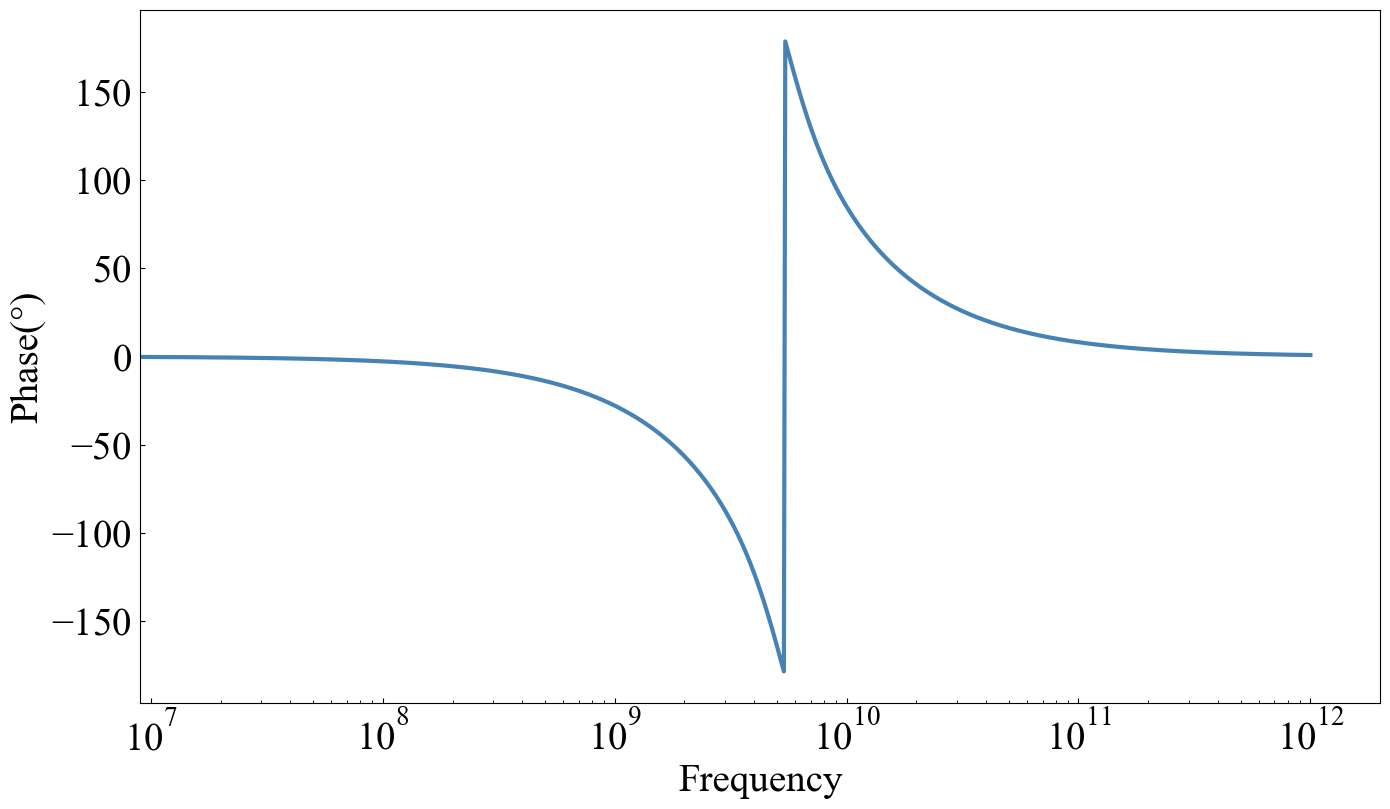

In [55]:
fig = plt.figure(facecolor='w',figsize=(16,9))
plt.rc('font',**fontD) # change fonts
ax = fig.add_subplot(1, 1, 1)
ax.tick_params(which = 'both', direction = "in",pad = 6, color = 'black')
ax.set_xscale('log')
ax.set_xlim(9e6,2e12)
ax.plot(freq, np.angle(Hs_values)/cst.pi*180, color='#4682B4',lw = 3)
plt.xlabel('Frequency')
plt.ylabel('Phase(°)')
plt.savefig('Q2-phase.png', bbox_inches='tight', pad_inches=0.05, dpi=300, transparent=True)
plt.show()